In [18]:
# ! pip install wordcloud

import codecs
from os import listdir
import pickle
import re
import copy
from collections import Counter
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
neg_df = pd.read_pickle("C:/Users/family/Desktop/Sentiment_NLP/Dictionary/neg_df_no_comm.pkl")
pos_df = pd.read_pickle("C:/Users/family/Desktop/Sentiment_NLP/Dictionary/pos_df_no_comm.pkl")

In [3]:
#Read Data
def load_data(filename):
    #open text file
    with codecs.open(filename, 'r', encoding = 'utf-8') as file:
        text = file.read()
    return text 

In [4]:
def clean_data(text):
    word_pattern = re.compile("^\w+$")
    esw = stopwords.words('english')
    esw.append("would")
    
    #tokenize, stemming, converting to lower...
    tokens = WordPunctTokenizer().tokenize(PorterStemmer().stem(text))
    tokens = list(map(lambda x: x.lower(), tokens))
    tokens = [token for token in tokens if re.match(word_pattern, token) and token not in esw]
    tokens = [word for word in tokens if len(word) > 1]
#     print(tokens)
    return tokens

In [5]:
def plot_bar(pos_freq, neg_freq, neu_freq):
    # this is for plotting purpose
    no_words = [pos_freq, neg_freq, neu_freq]
    label = ['pos_freq', 'neg_freq', 'neu_freq']
    index = np.arange(3)
    plt.bar(index, no_words)
    plt.xlabel('Genre', fontsize=10)
    plt.ylabel('No Words', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Sentiment Analysis')
    plt.show()

In [19]:
def plot_wordcloud(text):
    #token = clean_data(text)
    wordcloud = WordCloud().generate(text)
  
    # Display the generated image:
    # the matplotlib way:

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [11]:
# funtion where classification for sentiment is done
def sentiment_analysis(text):
    pos_freq = 0
    neg_freq = 0
    neu_freq = 0
    token = clean_data(text)
    total_words = len(token)

    for i in token:
        if (neg_df['word'] == i).any():
            neg_freq += 1
        elif (pos_df['word'] == i).any():
            pos_freq += 1
        else:
            neu_freq += 1 
        
    pos_percentage = (pos_freq/total_words)*100
    neg_percentage = (neg_freq/total_words)*100
    neu_percentage = (neu_freq/total_words)*100
    print('No of posititve words :{}'.format(pos_freq))
    print('No of negative words :{}'.format(neg_freq))
    print('No of neutral words :{}'.format(neu_freq))
    print('Postive words : {}'.format(pos_percentage))
    print('Negative words: {}'.format(neg_percentage))
    print('Neutral words: {}'.format(neu_percentage))
    plot_bar(pos_freq, neg_freq, neu_freq)
    plot_wordcloud(text)
    

In [ ]:
C:\Users\family\Desktop\Assignments\ALY 6040\week1\texts
C:\Users\family\Desktop\Assignments\ALY 6040\week1\texts

No of posititve words :1696
No of negative words :633
No of neutral words :205
Postive words : 66.92975532754538
Negative words: 24.980268350434095
Neutral words: 8.089976322020522


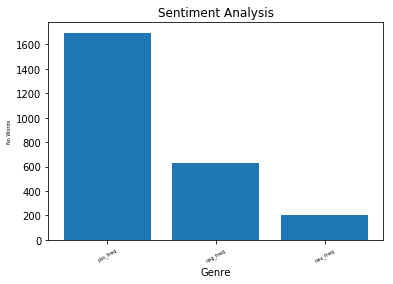

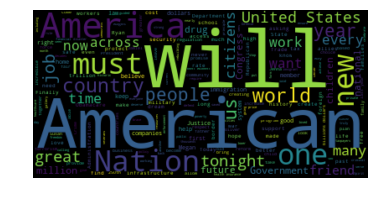

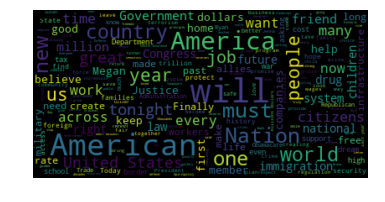

In [20]:
#open a tex file by using load_data function.
test = load_data("C:/Users/family/Desktop/Assignments/ALY 6040/week1/texts/Trump Congressional Address.txt")
#fucntion to check the sentiment of the given text documnets.

sentiment_analysis(test)